In [1]:
import numpy as np
x = np.random.randint(low=0, high=100, size=100)

# Compute frequency and bins
frequency, bins = np.histogram(x, bins=10, range=[0, 100])

# Pretty Print
for b, f in zip(bins[1:], frequency):
    print(round(b, 1), ' '.join(np.repeat('*', f)))

10.0 * * * * * * *
20.0 * * * * * * * * * * * * * *
30.0 * * * * * *
40.0 * * * * * * *
50.0 * * * * * * * *
60.0 * * * * * * * * * * *
70.0 * * * * * * * * * * *
80.0 * * * * * * * * * * *
90.0 * * * * * * * * * * * *
100.0 * * * * * * * * * * * * *


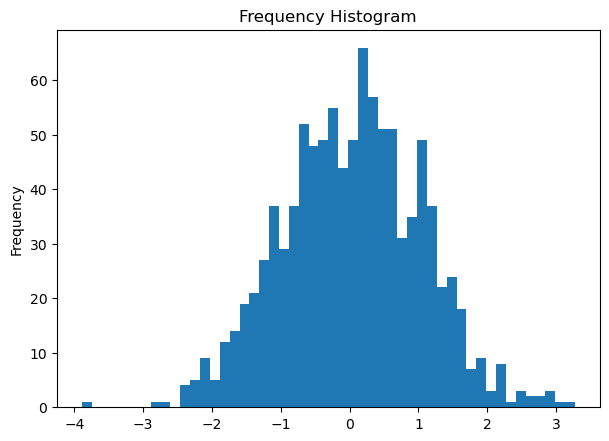

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = np.random.normal(size = 1000)
plt.hist(x, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Coparar la distribucion de diamond depth para tres diferentes valores de diamond cut en una misma grafica

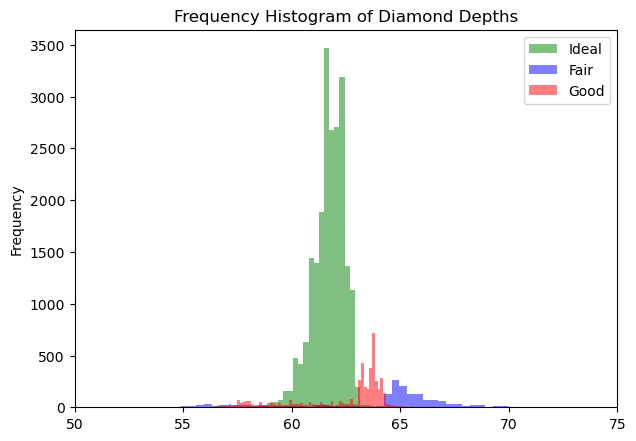

In [4]:
x1 = df.loc[df.cut=='Ideal', 'depth']
x2 = df.loc[df.cut=='Fair', 'depth']
x3 = df.loc[df.cut=='Good', 'depth']

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='g', label='Ideal')
plt.hist(x2, **kwargs, color='b', label='Fair')
plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
plt.xlim(50,75)
plt.legend();

Normalizacion rectificando la clase dominante:

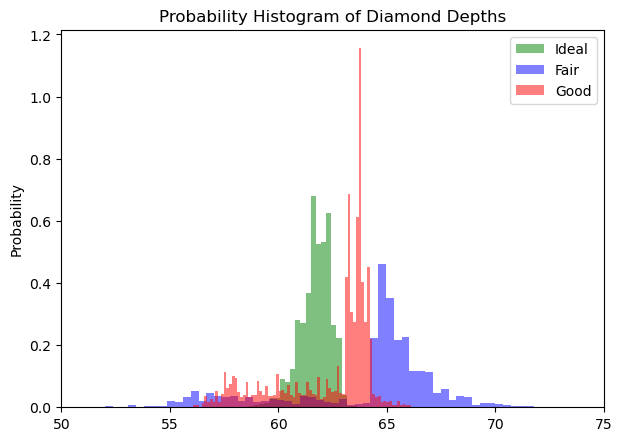

In [5]:
# Normalize
kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)

# Plot
plt.hist(x1, **kwargs, color='g', label='Ideal')
plt.hist(x2, **kwargs, color='b', label='Fair')
plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Probability Histogram of Diamond Depths', ylabel='Probability')
plt.xlim(50,75)
plt.legend();

Sub-graficas

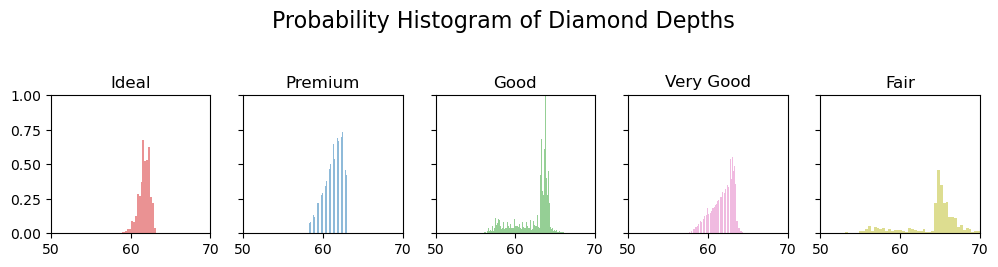

In [6]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')

# Plot
fig, axes = plt.subplots(1, 5, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

for i, (ax, cut) in enumerate(zip(axes.flatten(), df.cut.unique())):
    x = df.loc[df.cut==cut, 'depth']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(cut), color=colors[i])
    ax.set_title(cut)

plt.suptitle('Probability Histogram of Diamond Depths', y=1.05, size=16)
ax.set_xlim(50, 70); ax.set_ylim(0, 1);
plt.tight_layout();


Histogramas y graficos de densidad

C:\Users\guaja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\guaja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\guaja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

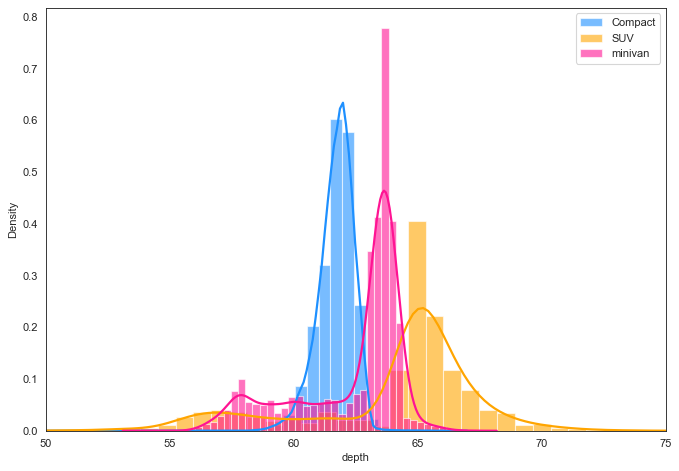

In [14]:
import seaborn as sns
sns.set_style("white")

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')
x1 = df.loc[df.cut=='Ideal', 'depth']
x2 = df.loc[df.cut=='Fair', 'depth']
x3 = df.loc[df.cut=='Good', 'depth']

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Compact", **kwargs)
sns.distplot(x2, color="orange", label="SUV", **kwargs)
sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
plt.xlim(50,75)
plt.legend();

In [15]:
# Groupby: cutwise median
price = df[['cut', 'price']].groupby('cut').median().round(2)
price

,price
cut,
Fair,3282.0
Good,3050.5
Ideal,1810.0
Premium,3185.0
Very Good,2648.0


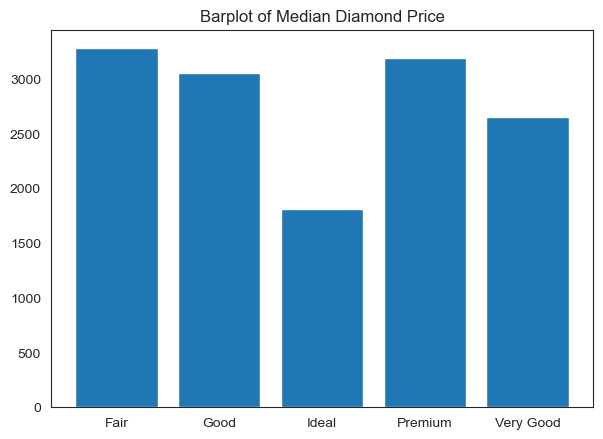

In [16]:
fig, axes = plt.subplots(figsize=(7,5), dpi=100)
plt.bar(price.index, height=price.price)
plt.title('Barplot of Median Diamond Price');